Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well

In [ ]:
!pip install pystan==2.19.1.1 prophet
!pip install fbprophet
from fbprophet import Prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 87 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.9 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6638823 sha256=9fb41f01e68a0be7f9c001682873f3a4c047d04c448ba8bf2104ae682e81eb98
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.8
    Uninstalling cmdstanpy-1.0.8:
      Successfully uninstalled cmdstanpy-1.0.8
ERROR: pip's dependency resolver does not currently take into account all the p

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/numenta/NAB/master/data/realKnownCause/nyc_taxi.csv')

In [ ]:
df

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820
...,...,...
10315,2015-01-31 21:30:00,24670
10316,2015-01-31 22:00:00,25721
10317,2015-01-31 22:30:00,27309
10318,2015-01-31 23:00:00,26591


In [ ]:
df['timestamp']=pd.to_datetime(df['timestamp'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  10320 non-null  datetime64[ns]
 1   value      10320 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 161.4 KB


In [ ]:
df.head()

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820


In [ ]:
df=df.set_index('timestamp').resample("H").mean()

In [ ]:
df

,value
timestamp,
2014-07-01 00:00:00,9485.5
2014-07-01 01:00:00,5433.0
2014-07-01 02:00:00,3346.5
2014-07-01 03:00:00,2216.5
2014-07-01 04:00:00,2189.5
...,...
2015-01-31 19:00:00,28288.5
2015-01-31 20:00:00,24138.0
2015-01-31 21:00:00,24194.5


In [ ]:
fig = px.line(df.reset_index(), x='timestamp', y='value', title='NYC Taxi Demand')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="3y", step="year", stepmode="backward"),
            dict(count=3, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

#in the graph, we can see the outliers

In [ ]:
from fbprophet import Prophet

In [ ]:
taxi_df=df.reset_index()[['timestamp','value']].rename({'timestamp':'ds','value':'y'}, axis='columns')

In [ ]:
taxi_df

,ds,y
0,2014-07-01 00:00:00,9485.5
1,2014-07-01 01:00:00,5433.0
2,2014-07-01 02:00:00,3346.5
3,2014-07-01 03:00:00,2216.5
4,2014-07-01 04:00:00,2189.5
...,...,...
5155,2015-01-31 19:00:00,28288.5
5156,2015-01-31 20:00:00,24138.0
5157,2015-01-31 21:00:00,24194.5
5158,2015-01-31 22:00:00,26515.0


In [ ]:
train=taxi_df[(taxi_df['ds'] >= '2014-07-01') & (taxi_df['ds'] <= '2015-01-27')]
test=taxi_df[(taxi_df['ds'] > '2015-01-27')]

In [ ]:
train.shape

(5041, 2)

In [ ]:
test.shape

(119, 2)

In [ ]:
test

,ds,y
5041,2015-01-27 01:00:00,39.5
5042,2015-01-27 02:00:00,29.0
5043,2015-01-27 03:00:00,9.5
5044,2015-01-27 04:00:00,14.5
5045,2015-01-27 05:00:00,29.0
...,...,...
5155,2015-01-31 19:00:00,28288.5
5156,2015-01-31 20:00:00,24138.0
5157,2015-01-31 21:00:00,24194.5
5158,2015-01-31 22:00:00,26515.0


In [ ]:
m = Prophet(changepoint_range=0.95) #changepoint_range is like confidence interval

In [ ]:
m.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=119,freq='H')
future.tail(167)

,ds
4993,2015-01-25 01:00:00
4994,2015-01-25 02:00:00
4995,2015-01-25 03:00:00
4996,2015-01-25 04:00:00
4997,2015-01-25 05:00:00
...,...
5155,2015-01-31 19:00:00
5156,2015-01-31 20:00:00
5157,2015-01-31 21:00:00
5158,2015-01-31 22:00:00


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
5155,2015-01-31 19:00:00,23778.529213,18957.994292,28449.958473
5156,2015-01-31 20:00:00,24342.584334,19700.308585,28955.285994
5157,2015-01-31 21:00:00,23219.297735,18418.220186,28018.431168
5158,2015-01-31 22:00:00,21027.355314,16480.640052,26035.275893
5159,2015-01-31 23:00:00,18500.216845,13790.334142,23199.446319


In [ ]:
results=pd.concat([taxi_df.set_index('ds')['y'],forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']]],axis=1)

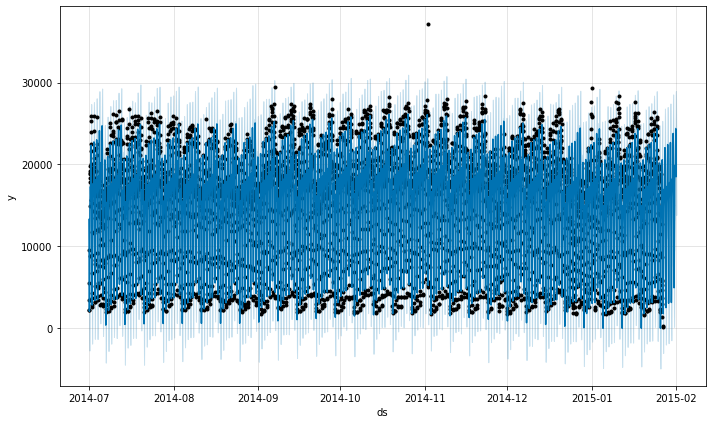

In [ ]:
fig1 = m.plot(forecast) #black dots are ACTAUL observations, Blue -- Prediction; Light blue -- upper and lower Confidence interval

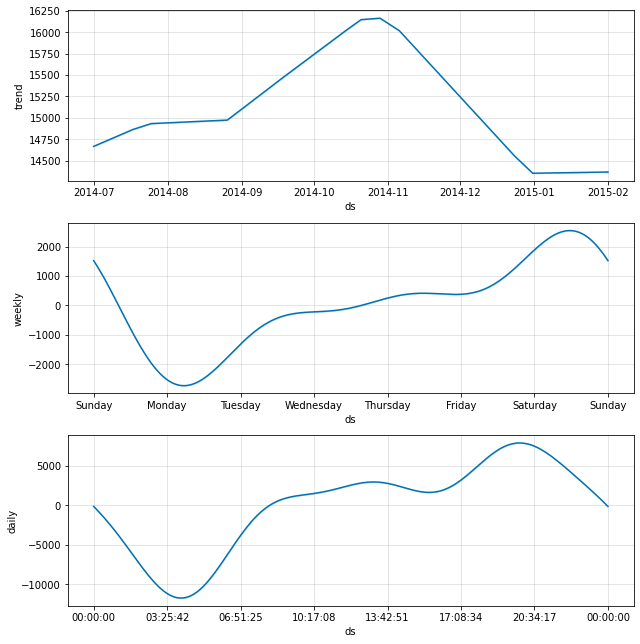

In [ ]:
comp=m.plot_components(forecast)

In [ ]:
results

,y,yhat,yhat_lower,yhat_upper
ds,,,,
2014-07-01 00:00:00,9485.5,13240.732792,8346.267464,17962.827559
2014-07-01 01:00:00,5433.0,10232.486172,5600.727832,14704.454909
2014-07-01 02:00:00,3346.5,6669.099458,1675.729829,11020.192052
2014-07-01 03:00:00,2216.5,3448.054270,-1583.936507,8683.241125
2014-07-01 04:00:00,2189.5,2017.409931,-2794.940001,6502.988715
...,...,...,...,...
2015-01-31 19:00:00,28288.5,23778.529213,18957.994292,28449.958473
2015-01-31 20:00:00,24138.0,24342.584334,19700.308585,28955.285994
2015-01-31 21:00:00,24194.5,23219.297735,18418.220186,28018.431168


In [ ]:
results['error'] = results['y'] - results['yhat']

In [ ]:
results["uncertainty"] = results['yhat_upper'] - results['yhat_lower']

In [ ]:
results

,y,yhat,yhat_lower,yhat_upper,error,uncertainty
ds,,,,,,
2014-07-01 00:00:00,9485.5,13240.732792,8346.267464,17962.827559,-3755.232792,9616.560096
2014-07-01 01:00:00,5433.0,10232.486172,5600.727832,14704.454909,-4799.486172,9103.727077
2014-07-01 02:00:00,3346.5,6669.099458,1675.729829,11020.192052,-3322.599458,9344.462224
2014-07-01 03:00:00,2216.5,3448.054270,-1583.936507,8683.241125,-1231.554270,10267.177631
2014-07-01 04:00:00,2189.5,2017.409931,-2794.940001,6502.988715,172.090069,9297.928716
...,...,...,...,...,...,...
2015-01-31 19:00:00,28288.5,23778.529213,18957.994292,28449.958473,4509.970787,9491.964181
2015-01-31 20:00:00,24138.0,24342.584334,19700.308585,28955.285994,-204.584334,9254.977409
2015-01-31 21:00:00,24194.5,23219.297735,18418.220186,28018.431168,975.202265,9600.210982


In [ ]:
results[results['error'].abs() >  1.5*results['uncertainty']] #to calculate outliers

,y,yhat,yhat_lower,yhat_upper,error,uncertainty
ds,,,,,,
2014-11-02 01:00:00,37204.5,14218.892870,9578.752892,18890.578490,22985.607130,9311.825598
2015-01-01 01:00:00,29292.0,11405.545567,6634.554123,16200.191291,17886.454433,9565.637168
2015-01-01 02:00:00,25753.5,7770.054639,2774.197732,12345.594298,17983.445361,9571.396565
2015-01-01 03:00:00,22067.0,4478.895177,-104.955753,9067.240160,17588.104823,9172.195913
2015-01-26 19:00:00,4565.5,19771.308307,15098.239423,24198.721018,-15205.808307,9100.481594
2015-01-26 20:00:00,3630.5,20546.581743,15588.817071,25309.973074,-16916.081743,9721.156003
2015-01-26 21:00:00,2907.0,19647.710004,14873.134962,24568.352949,-16740.710004,9695.217987
2015-01-26 22:00:00,1324.5,17691.969234,12973.603506,22342.814400,-16367.469234,9369.210894
2015-01-26 23:00:00,243.0,15411.348672,10448.671826,20235.489064,-15168.348672,9786.817237


In [ ]:
results['anomaly'] = results.apply(lambda x: 'Yes' if(np.abs(x['error']) >  1.5*x['uncertainty']) else 'No', axis=1)

In [ ]:
results

,y,yhat,yhat_lower,yhat_upper,error,uncertainty,anomaly
ds,,,,,,,
2014-07-01 00:00:00,9485.5,13240.732792,8346.267464,17962.827559,-3755.232792,9616.560096,No
2014-07-01 01:00:00,5433.0,10232.486172,5600.727832,14704.454909,-4799.486172,9103.727077,No
2014-07-01 02:00:00,3346.5,6669.099458,1675.729829,11020.192052,-3322.599458,9344.462224,No
2014-07-01 03:00:00,2216.5,3448.054270,-1583.936507,8683.241125,-1231.554270,10267.177631,No
2014-07-01 04:00:00,2189.5,2017.409931,-2794.940001,6502.988715,172.090069,9297.928716,No
...,...,...,...,...,...,...,...
2015-01-31 19:00:00,28288.5,23778.529213,18957.994292,28449.958473,4509.970787,9491.964181,No
2015-01-31 20:00:00,24138.0,24342.584334,19700.308585,28955.285994,-204.584334,9254.977409,No
2015-01-31 21:00:00,24194.5,23219.297735,18418.220186,28018.431168,975.202265,9600.210982,No


In [ ]:
fig = px.scatter(results.reset_index(), x='ds', y='y', color='anomaly', title='NYC Taxi Demand')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="3y", step="year", stepmode="backward"),
            dict(count=3, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

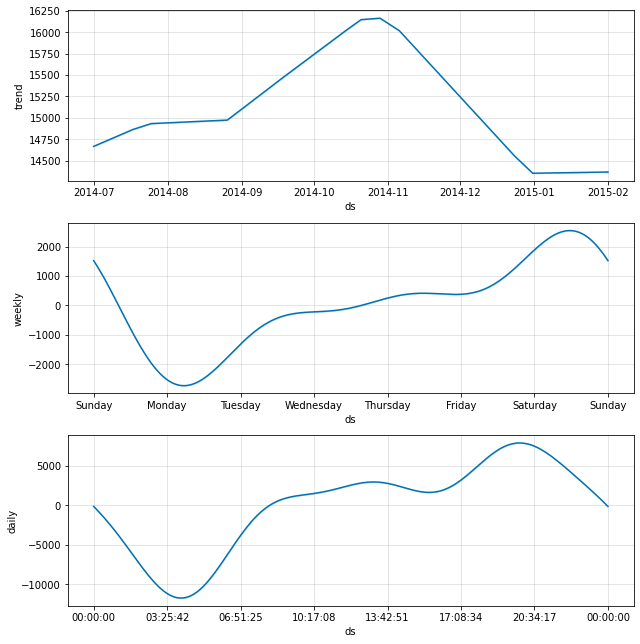

In [ ]:
comp=m.plot_components(forecast)